#                Task1 :TITANIC SURVIVAL PREDICTION

1. Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.
2. The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

# Data Collection :

In [1]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# loading and reading the dataset
titanic_data= pd.read_csv("tested.csv")
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
#Printing top 5 rows
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Types of features :
* Categorical  =Sex , Embarked
* Continuous   = Age,Fare
* Discrete     = SibSp,Parch
* alphanumeric = Cabin

# Data Preprocessing :

In [4]:
# number of rows and columns
titanic_data.shape

(418, 12)

In [5]:
 # to get infomation about the data
 titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
# check missing values
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
# droping the cabin column from the dataframe because majority of values are missing i.e. 327
titanic_data=titanic_data.drop(columns='Cabin',axis=1)

In [8]:
# calculating mean of Age column
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

# calculating mean of Fare column
titanic_data['Fare'].fillna(titanic_data['Fare'].mean(), inplace=True)


In [9]:
# again verifying the missing values
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Exploratory Data Analysis :

In [10]:
#statistical summary of the numerical columns in the DataFrame
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
#counts of unique values in Survived column
titanic_data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

# Data Visualization :

In [12]:
sns.set()

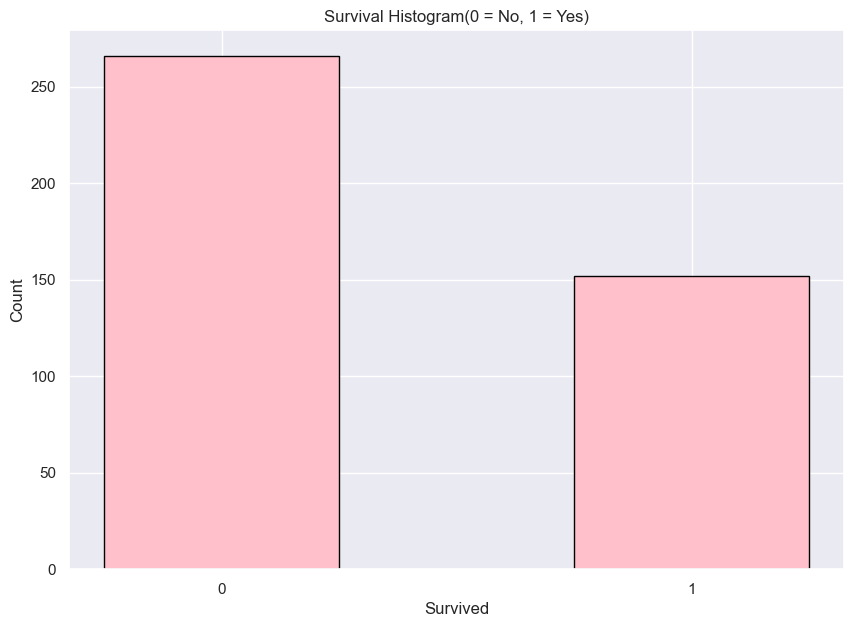

In [13]:
fig = plt.figure(figsize=(10, 7))
column = 'Survived'
plt.hist(
    titanic_data[column],
    bins=[-0.5, 0.5, 1.5],
    rwidth=0.5, align='mid',
    color='pink',
    edgecolor='black')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Histogram(0 = No, 1 = Yes)')
plt.xticks([0, 1])
plt.show()

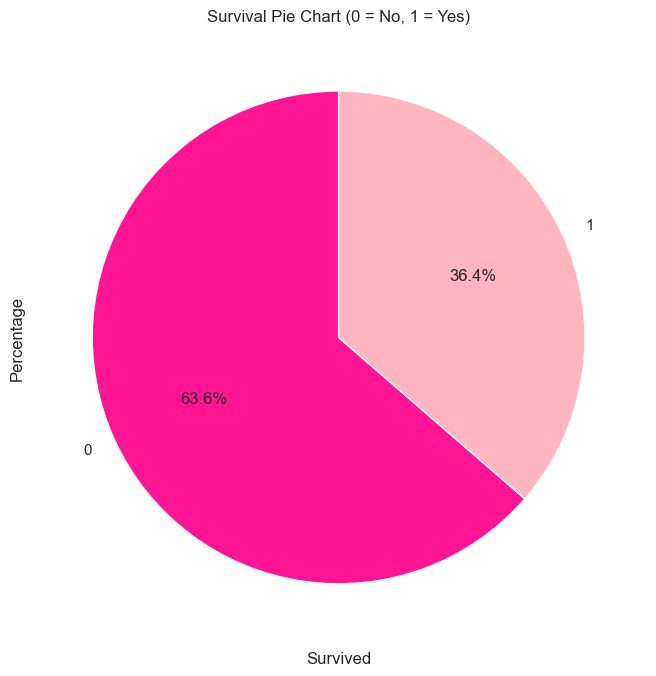

In [14]:
#same visualization only in pie chart
survival_percentage = titanic_data['Survived'].value_counts(normalize=True) * 100
colors = ["#FF1493", "#FFB6C1"]  
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize=(8, 8))
plt.pie(survival_percentage, labels=survival_percentage.index, autopct='%1.1f%%', startangle=90)
plt.xlabel('Survived')
plt.ylabel('Percentage')
plt.title('Survival Pie Chart (0 = No, 1 = Yes)')
plt.show()


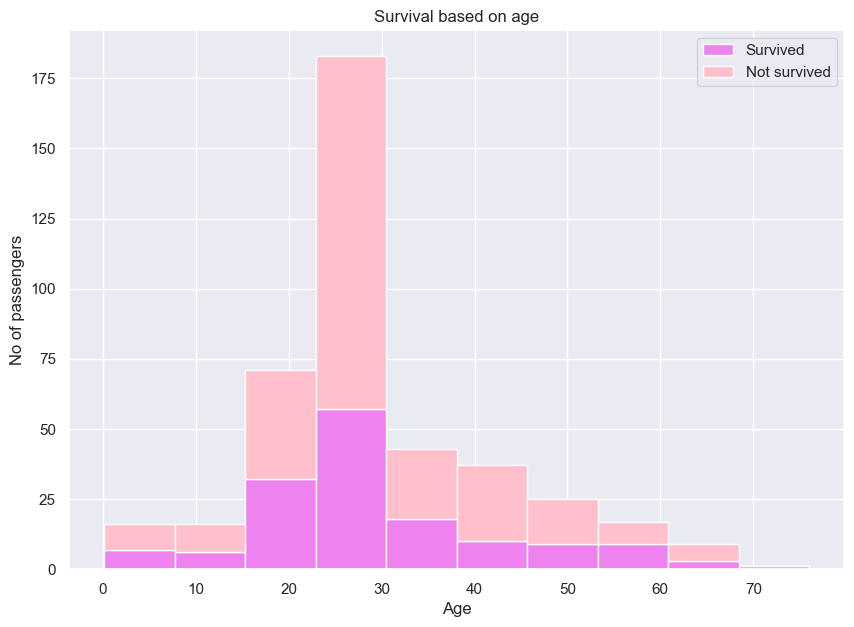

In [15]:
fig = plt.figure(figsize =(10, 7))
plt.hist(
    x = [titanic_data[titanic_data['Survived']==1]['Age'], 
    titanic_data[titanic_data['Survived']==0]['Age']],
    stacked=True, color = ['violet','pink'],
    label = ['Survived','Not survived'])
plt.title('Survival based on age')
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.legend()

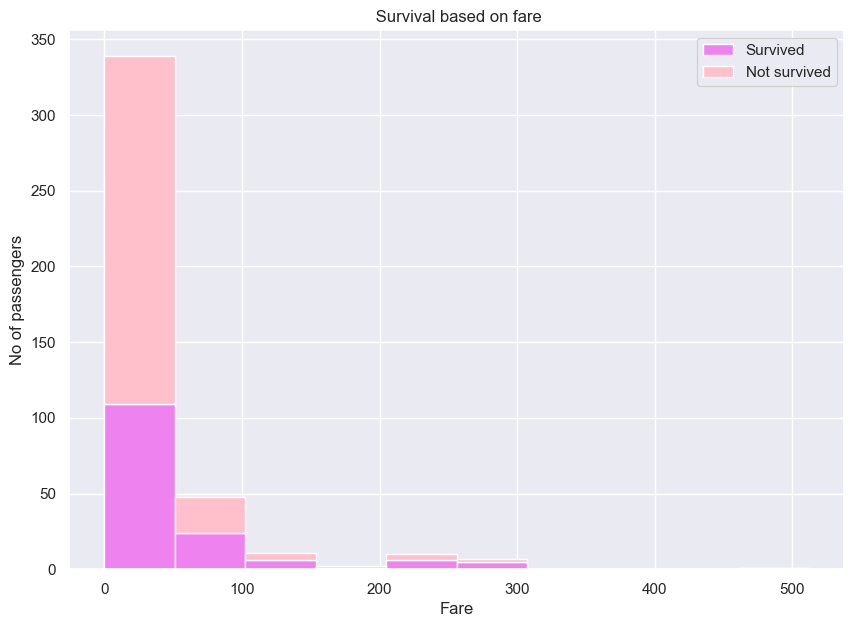

In [16]:
fig = plt.figure(figsize =(10, 7))
plt.hist(
    x = [titanic_data[titanic_data['Survived']==1]['Fare'],
    titanic_data[titanic_data['Survived']==0]['Fare']], 
    stacked=True, 
    color = ['violet','pink'],
    label = ['Survived','Not survived'])
plt.title(' Survival based on fare')
plt.xlabel('Fare')
plt.ylabel('No of passengers')
plt.legend()
     

In [17]:
#counts of unique values in the 'Sex' column
titanic_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

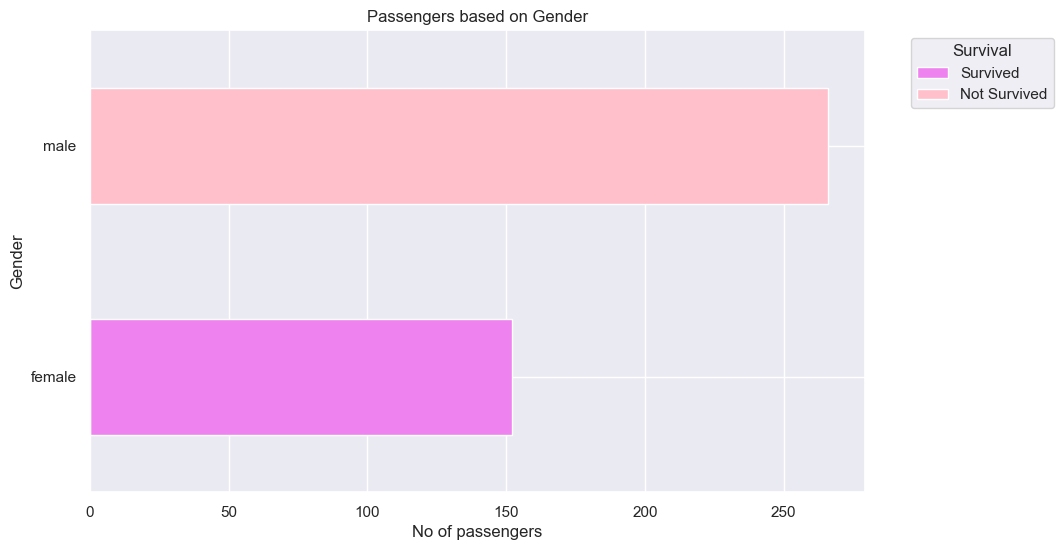

In [18]:
survived_counts = titanic_data[titanic_data['Survived'] == 1]['Sex'].value_counts()
not_survived_counts = titanic_data[titanic_data['Survived'] == 0]['Sex'].value_counts()
gender_counts = pd.DataFrame({'Survived': survived_counts, 'Not Survived': not_survived_counts})
fig, ax = plt.subplots(figsize=(10, 6))
gender_counts.sort_values(by='Survived', ascending=True).plot(kind='barh', stacked=True, color=['violet', 'pink'], ax=ax)
plt.title('Passengers based on Gender')
plt.xlabel('No of passengers')
plt.ylabel('Gender')
plt.legend(title='Survival', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# encoding

In [19]:
titanic_data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [20]:
# converting categorical into numerical column
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True) 
titanic_data.head()
     

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


# Split the Data :

In [21]:
#separating the features (X) and the target variable (Y) from dataset
X=titanic_data.drop(columns=['PassengerId','Name','Ticket','Survived'], axis=1)
Y=titanic_data['Survived']

In [22]:
print(X)
print(Y)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]
0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [23]:
#Spliting training and test data
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)   
print(X.shape,X_train.shape,X_test.shape)

(418, 7) (334, 7) (84, 7)


In [24]:
model=LogisticRegression()
model.fit(X_train, Y_train)

C:\Users\Admin\anaconda3.x\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Evaluate the Model:

In [25]:
# accuracy on training data
X_train_prediction=model.predict(X_train)    
print(X_train_prediction)

[1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1]


In [26]:
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)
print('Accuracy score of training data :{:.2f}%'.format(training_data_accuracy*100 ))

Accuracy score of training data :100.00%


In [27]:
X_test_prediction=model.predict(X_test)
print(X_test_prediction)

[0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0]


In [28]:
testing_data_accuracy=accuracy_score(Y_test,X_test_prediction)
print('Accuracy score of test data :{:.2f}%'.format(testing_data_accuracy*100 ))

Accuracy score of test data :100.00%
